In [3]:
import pandas as pd
from string import punctuation
 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam
from keras.datasets import fashion_mnist 
from keras import models 
from keras import layers 
from keras import optimizers 
from keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import SGD, Adam
from keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical
from keras.preprocessing  import  image 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import h5py

In [4]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 136s 1us/step


In [5]:
print('x_train Shape: {}'.format(x_train.shape))
print('x_test Shape: {}'.format(x_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

x_train Shape: (50000, 32, 32, 3)
x_test Shape: (10000, 32, 32, 3)
y_train Shape: (50000, 1)
y_test Shape: (10000, 1)


In [6]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [7]:
num_classes = 10
classes = { 0:"airplane(літак)", 
            1: "automobile(автомобіль)",
            2: "bird(птах)",
            3: "cat(кот)",
            4: "deer(олень)",
            5: "dog(пес)",
            6: "frog(жаба)",
            7: "horse(кінь)",
            8: "ship(корабель)",
            9: "truck(вантажівка)"}

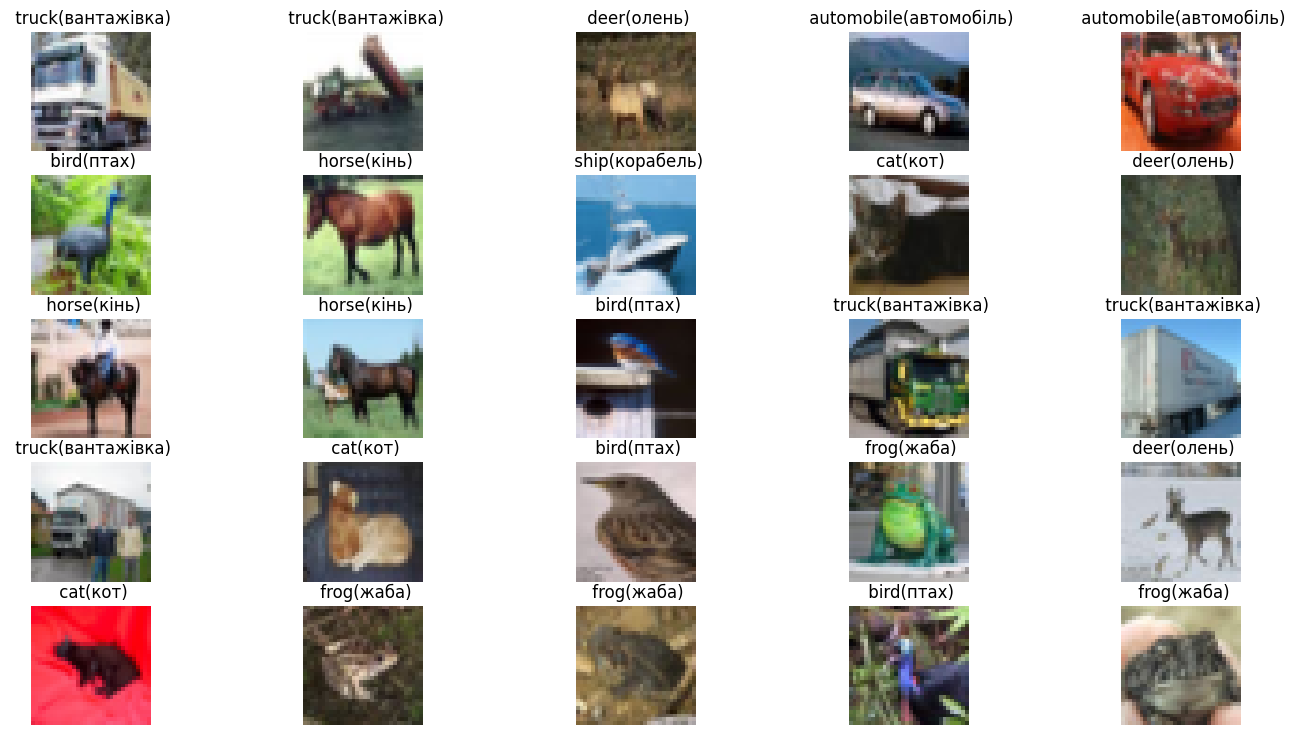

In [8]:
plt.figure(figsize=(17,9))
for i in range(1, 26):
  plt.subplot(5, 5, i-1 + 1)
  plt.imshow(x_train[i])
  plt.axis('off')
  plt.title(f" {classes[y_train[i][0]]}")

In [9]:
# set up image augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.15,
    height_shift_range=0.15,
    zoom_range=0.3
    )
datagen.fit(x_train)


In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = np.array(x_train) / 255.0
x_test = np.array(x_test) / 255.0

# Преобразуем метки в категории


y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

print(f"x_train: {x_train.shape}, x_test: {x_test.shape}\ny_train: {y_train.shape}, y_test: {y_test.shape}")


x_train: (50000, 32, 32, 3), x_test: (10000, 32, 32, 3)
y_train: (50000, 10), y_test: (10000, 10)


In [11]:
reg=None
reg2=None
num_filters=32
ac='relu'
# adm=Adam(lr=0.001,decay=0, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# opt=adm
drop_dense=0.5
drop_conv=0
input_shape = (32,32, 3)

model = Sequential(name='cifar10')

# Слой 2D-свертки (например, пространственная свертка изображений)
model.add(Conv2D(num_filters, (3, 3), activation=ac, kernel_regularizer=reg,  input_shape=(32,32, 3), padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 16x16x3xnum_filters
model.add(Dropout(drop_conv))

model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(2*num_filters, (3, 3), activation=ac, kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 8x8x3x(2*num_filters)
model.add(Dropout(drop_conv))

model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(4*num_filters, (3, 3), activation=ac,kernel_regularizer=reg, padding='same'))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))   # reduces to 4x4x3x(4*num_filters)
model.add(Dropout(drop_conv))

model.add(Flatten())
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_1'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(2048, activation=ac, kernel_regularizer=reg2, name='hidden_2'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(1024, activation=ac, kernel_regularizer=reg2, name='hidden_4'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(512, activation=ac, kernel_regularizer=reg2, name='hidden_5'))
model.add(BatchNormalization())
model.add(Dropout(drop_dense))
model.add(Dense(num_classes, activation='softmax', name='output'))

In [12]:
model.summary()

Model: "cifar10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 32, 32, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                           

In [13]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 10)


In [14]:
from keras.optimizers import Adam

model.compile(
    loss="binary_crossentropy",
    optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08),
    metrics=["accuracy"]
)

In [15]:
history = model.fit(
    x_train, y_train,
    batch_size=256,
    steps_per_epoch=int(len(x_train) / 256),  # Convert to integer using int()
    epochs=100,
    validation_data=(x_test, y_test)
)

Epoch 1/100


195/195 [==============================] - 150s 745ms/step - loss: 0.4795 - accuracy: 0.3048 - val_loss: 0.4386 - val_accuracy: 0.1015
Epoch 2/100
195/195 [==============================] - 146s 750ms/step - loss: 0.2195 - accuracy: 0.5345 - val_loss: 0.3249 - val_accuracy: 0.2687
Epoch 3/100
195/195 [==============================] - 143s 732ms/step - loss: 0.1746 - accuracy: 0.6397 - val_loss: 0.1960 - val_accuracy: 0.5910
Epoch 4/100
195/195 [==============================] - 156s 798ms/step - loss: 0.1441 - accuracy: 0.7117 - val_loss: 0.2012 - val_accuracy: 0.6017
Epoch 5/100
195/195 [==============================] - 151s 774ms/step - loss: 0.1222 - accuracy: 0.7578 - val_loss: 0.1451 - val_accuracy: 0.7263
Epoch 6/100
195/195 [==============================] - 150s 770ms/step - loss: 0.1056 - accuracy: 0.7937 - val_loss: 0.1291 - val_accuracy: 0.7442
Epoch 7/100
195/195 [==============================] - 137s 705ms/step - loss: 0.0908 - accuracy: 0.8253 - val_loss:

In [16]:
result_test = model.evaluate(x_test, y_test)
result_train = model.evaluate(x_train, y_train)
print("Відсоток точності тестових даних: ", round(result_test[1] * 100, 2))
print("Відсоток точності навчальних даних: ", round(result_train[1] * 100, 2))

1563/1563 [==============================] - 46s 29ms/step - loss: 0.0025 - accuracy: 0.9959
Відсоток точності тестових даних:  81.09
Відсоток точності навчальних даних:  99.59


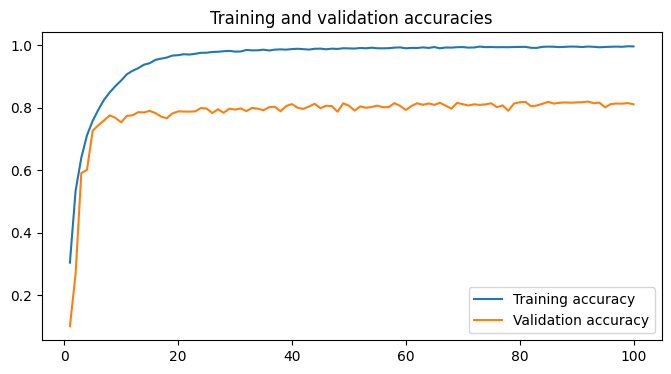

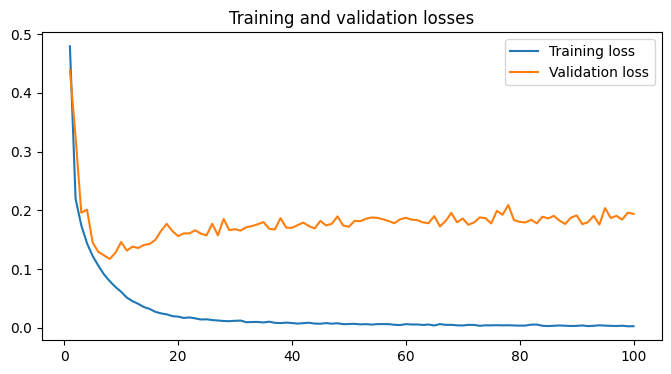

In [17]:
epochs = range(1, len(history.history["accuracy"]) + 1) 

plt.figure(figsize=(8, 4))
plt.plot(epochs, history.history["accuracy"],   label="Training accuracy")
plt.plot(epochs, history.history["val_accuracy"], label="Validation accuracy") 
plt.title("Training and validation accuracies") 
plt.legend() 
plt.figure(figsize=(8, 4)) 
plt.plot(epochs, history.history["loss"],  label="Training loss") 
plt.plot(epochs, history.history["val_loss"], label="Validation loss") 
plt.title("Training and validation losses") 
plt.legend()
plt.show()

In [18]:
model.save("model/basesd_model_new.h5")

c:\Users\Veronika\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
